# Lab 3: Gesture Recognition using Convolutional Neural Networks

In this lab you will train a convolutional neural network to make classifications on different hand gestures. By the end of the lab, you should be able to:

1. Load and split data for training, validation and testing
2. Train a Convolutional Neural Network
3. Apply transfer learning to improve your model

Note that for this lab we will not be providing you with any starter code. You should be able to take the code used in previous labs, tutorials and lectures and modify it accordingly to complete the tasks outlined below.

### What to submit

Submit a PDF file containing all your code, outputs, and write-up
from parts 1-5. You can produce a PDF of your Google Colab file by
going to **File > Print** and then save as PDF. The Colab instructions
has more information. Make sure to review the PDF submission to ensure that your answers are easy to read. Make sure that your text is not cut off at the margins.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission.

In [ ]:
%%shell
jupyter nbconvert --to html "/content/Lab3_Gesture_Recognition-2.ipynb"

[NbConvertApp] Converting notebook /content/Lab3_Gesture_Recognition-2.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 765522 bytes to /content/Lab3_Gesture_Recognition-2.html


## Colab Link

Include a link to your colab file here

Colab Link: https://colab.research.google.com/drive/1M7DDDdhMKVBpD1_RtvTTVunKOLFnsxMZ?usp=sharing

## Dataset

American Sign Language (ASL) is a complete, complex language that employs signs made by moving the
hands combined with facial expressions and postures of the body. It is the primary language of many
North Americans who are deaf and is one of several communication options used by people who are deaf or
hard-of-hearing. The hand gestures representing English alphabet are shown below. This lab focuses on classifying a subset
of these hand gesture images using convolutional neural networks. Specifically, given an image of a hand
showing one of the letters A-I, we want to detect which letter is being represented.

![alt text](https://www.disabled-world.com/pics/1/asl-alphabet.jpg)

## Part B. Building a CNN [50 pt]

For this lab, we are not going to give you any starter code. You will be writing a convolutional neural network
from scratch. You are welcome to use any code from previous labs, lectures and tutorials. You should also
write your own code.

You may use the PyTorch documentation freely. You might also find online tutorials helpful. However, all
code that you submit must be your own.

Make sure that your code is vectorized, and does not contain obvious inefficiencies (for example, unecessary
for loops, or unnecessary calls to unsqueeze()). Ensure enough comments are included in the code so that
your TA can understand what you are doing. It is your responsibility to show that you understand what you
write.

**This is much more challenging and time-consuming than the previous labs.** Make sure that you
give yourself plenty of time by starting early.

### 1. Data Loading and Splitting [5 pt]

Download the anonymized data provided on Quercus. To allow you to get a heads start on this project we will provide you with sample data from previous years. Split the data into training, validation, and test sets.

Note: Data splitting is not as trivial in this lab. We want our test set to closely resemble the setting in which
our model will be used. In particular, our test set should contain hands that are never seen in training!

Explain how you split the data, either by describing what you did, or by showing the code that you used.
Justify your choice of splitting strategy. How many training, validation, and test images do you have?

For loading the data, you can use plt.imread as in Lab 1, or any other method that you choose. You may find
torchvision.datasets.ImageFolder helpful. (see https://pytorch.org/docs/stable/torchvision/datasets.html?highlight=image%20folder#torchvision.datasets.ImageFolder
)

In [ ]:
import torchvision.datasets as datasets
import os
import torch
import torchvision.transforms as transforms
from torch.utils.data import Subset


In [ ]:
import os
print(os.getcwd())  # Check current working directory
print(os.listdir())  # List files and folders in the current directory


/Users/shakthi
['Lab3_Gesture_Recognition.ipynb', 'database8.mdb', 'radio 5-LABS.wav.asd', 'Music', 'radio.wav.asd', '.docker', 'crumplepop_log.txt', '.anyconnect', 'radio 3-LABS.wav.asd', 'radio 4-LABS.wav.asd', '.DS_Store', 'justasummer.wav.asd', 'database.mdb', 'newsong.wav.asd', '.CFUserTextEncoding', 'radio 7-Audio.wav.asd', 'newsong3.wav.asd', 'radio.wav', 'Pictures', '.zprofile', 'justasummer13.wav.asd', '.zsh_history', '.ipython', 'Desktop', 'Library', 'newsong2.wav.asd', 'brandnewV1.wav', 'alien.wav.asd', 'justasummer.wav', 'Spitfire', 'Public', '.idlerc', '.cisco', 'Movies', '.Trash', 'newsong4.wav', '.ipynb_checkpoints', 'database13.mdb', '.jupyter', 'alien.wav', 'github-classroom', 'brandnewV1.wav.asd', 'Documents', 'database12.mdb', 'database10.mdb', 'database2.mdb', '.vscode', 'radio 6-Audio.wav.asd', 'newsong4.wav.asd', 'database3.mdb', 'radio 2-Audio.wav.asd', 'database11.mdb', 'Downloads', 'newsong2.wav', 'database7.mdb', 'database6.mdb', 'database14.mdb', 'newsong3.wa

In [ ]:
TRANSFORM_IMG = transforms.Compose([
        transforms.Resize((224, 224)), #resizing the image for part B
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
root_dir = "/Users/shakthi/Downloads/Lab3_Gestures_Summer"
dataset = datasets.ImageFolder(root=root_dir, transform=TRANSFORM_IMG)


class_indices = {cls_idx: [] for cls_idx in range(len(dataset.classes))}#once in the folder must get indices of each letter folder

for idx, (img_path, label) in enumerate(dataset.imgs):
    class_indices[label].append(idx)

for cls in class_indices:
    class_indices[cls].sort(key=lambda idx: os.path.basename(dataset.imgs[idx][0]))#ensure images in each folder keep their order

train_indices = []
val_indices = []
test_indices = []

for cls in class_indices:#begin splitting
    indices = class_indices[cls]
    split_idx = int(len(indices) * 0.8)  #80% of the images in each folder are used for training/validation
    train_val_indices = indices[:split_idx]
    test_indices.extend(indices[split_idx:])  #the last 20% of images in each folder are used for testing


    for i in range(0, len(train_val_indices), 3): #within train_val_indices group every 3 images
        group = train_val_indices[i:i+3]

        if len(group) == 3: #33% validation 66% training split
            train_indices.extend(group[:2])  #In a full group the first 2 = Training
            val_indices.append(group[2])  #last 1 = Validation
        else:
            train_indices.extend(group)

train_dataset = Subset(dataset, train_indices)#create the train dataset
val_dataset = Subset(dataset, val_indices)
test_dataset = Subset(dataset, test_indices)

batch_size = 32

#load the data
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Print dataset sizes
print(f"Train set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"Test set size: {len(test_dataset)}")


Train set size: 1186
Validation set size: 586
Test set size: 447


### 2. Model Building and Sanity Checking [15 pt]

### Part (a) Convolutional Network - 5 pt

Build a convolutional neural network model that takes the (224x224 RGB) image as input, and predicts the gesture
letter. Your model should be a subclass of nn.Module. Explain your choice of neural network architecture: how
many layers did you choose? What types of layers did you use? Were they fully-connected or convolutional?
What about other decisions like pooling layers, activation functions, number of channels / hidden units?

The architecture takes a 224x224 rgb image as input and predicts the corresponding gesture letter. The model consists of three convolutional layers with kernel size as a tunable hyperparameter, allowing flexibility in capturing spatial patterns. Each convolutional layer is followed by a relu activation function to introduce non-linearity and a max pooling layer to reduce spatial dimensions while retaining important features. The final feature maps are flattened and passed through fully connected layers, with 512 and 256 hidden units, before reaching the output layer, which matches the number of gesture classes.

In [ ]:

import torch
import torch.nn as nn
import torch.nn.functional as F


class CNN_GestureClassifier(nn.Module): #subclass of nn.Module
    def __init__(self, num_classes, kernel_size=3):#note number of classes=number of output
      """
      Architecture Explanation:
      - Both convolutional layers (3 total) and fully connected layers (2 total) for
        classification
      - Max pooling layers are used to decrease dimensionality
      - ReLU activation is used to support nonlinearity
      - Dropout layer is also used
      """
      super(CNN_GestureClassifier, self).__init__()

      self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=kernel_size, stride=1, padding=kernel_size // 2)#convolutional layer for initial feature extraction
      self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  #reduce spatial dimension
      self.conv2 = nn.Conv2d(32, 64, kernel_size=kernel_size, stride=1, padding=kernel_size // 2)#complex feature extraction is performed
      self.conv3 = nn.Conv2d(64, 128, kernel_size=kernel_size, stride=1, padding=kernel_size // 2)#most complex feature extraction

      # Fully connected layers
      self.fc1 = nn.Linear(128 * 28 * 28, 512)  # flattens feature maps to 512 neurons
      self.dropout = nn.Dropout(0.5)  #dropout layer
      self.fc2 = nn.Linear(512, num_classes)  # Final output layer (performs classification)

    def forward(self, x):#activation function is applied
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))

        x = x.view(x.size(0), -1) #flatten to vector form
        x = F.relu(self.fc1(x))
        x = self.dropout(x) #dropout is applied for regularization
        x = self.fc2(x)  #output

        return x


num_classes = 9
model = CNN_GestureClassifier(num_classes)




### Part (b) Training Code - 5 pt

Write code that trains your neural network given some training data. Your training code should make it easy
to tweak the usual hyperparameters, like batch size, learning rate, and the model object itself. Make sure
that you are checkpointing your models from time to time (the frequency is up to you). Explain your choice
of loss function and optimizer.

Cross-entropy loss is used because this is a multi-class classification problem. Adaptive Moment Estimation (Adam) is used as the loss function. It incorporates momentum and adaptive learning rate, rapid convergence, requires minimal tuning, and is a commonly used optimizer. This is a great optimizer choice given the classification problem and size of the dataset.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import time
import os

def evaluate(net, loader, criterion):
    net.eval() #set model
    total_loss = 0.0
    total_err = 0.0
    total_samples = 0

    with torch.no_grad():
        for inputs, labels in loader:
            outputs = net(inputs) #forward pass
            loss = criterion(outputs, labels) #compute loss
            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1) #get predicted class
            total_err += (predicted != labels).sum().item() #keeps track of incorrect predictions
            total_samples += labels.size(0)

    avg_loss = total_loss / len(loader)
    error_rate = float(total_err) / total_samples
    return error_rate, avg_loss

def train_net(net, train_loader, val_loader, batch_size=32, learning_rate=0.001, num_epochs=20, checkpoint_dir="checkpoints"):
    torch.manual_seed(1000) #fixed seed for reproducibility
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=learning_rate, weight_decay=1e-4)

    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)

    os.makedirs(checkpoint_dir, exist_ok=True) #storage of model checkpoints
    start_time = time.time()

    for epoch in range(num_epochs):
        total_train_loss = 0.0
        total_train_err = 0.0
        total_samples = 0

        net.train()
        for i, (inputs, labels) in enumerate(train_loader, 0):
            optimizer.zero_grad() #gradients are reset
            outputs = net(inputs) #forward pass
            loss = criterion(outputs, labels)
            loss.backward() #backpropagation
            optimizer.step() #model weights are updated

            _, predicted = torch.max(outputs, 1)
            total_train_err += (predicted != labels).sum().item()
            total_train_loss += loss.item()
            total_samples += labels.size(0)

        train_err[epoch] = float(total_train_err) / total_samples
        train_loss[epoch] = float(total_train_loss) / len(train_loader)
        val_err[epoch], val_loss[epoch] = evaluate(net, val_loader, criterion)

        print(f"Epoch {epoch+1}/{num_epochs}: Train Err: {train_err[epoch]:.4f}, Train Loss: {train_loss[epoch]:.4f} | "
              f"Val Err: {val_err[epoch]:.4f}, Val Loss: {val_loss[epoch]:.4f}")

        model_path = os.path.join(checkpoint_dir, f"gesture_cnn_epoch{epoch+1}.pth")
        torch.save(net.state_dict(), model_path)

    elapsed_time = time.time() - start_time
    print(f"Total training time: {elapsed_time:.2f} seconds")

    np.savetxt(os.path.join(checkpoint_dir, "train_err.csv"), train_err)
    np.savetxt(os.path.join(checkpoint_dir, "train_loss.csv"), train_loss)
    np.savetxt(os.path.join(checkpoint_dir, "val_err.csv"), val_err)
    np.savetxt(os.path.join(checkpoint_dir, "val_loss.csv"), val_loss)


num_classes = 9
model = CNN_GestureClassifier(num_classes)  #CNN_GC model

train_net(model, train_loader, val_loader, batch_size=64, learning_rate=0.01, num_epochs=20)#training the model using 20 epochs and 0.01 lr for efficiency



Epoch 1/20: Train Err: 0.7909, Train Loss: 13.0318 | Val Err: 0.5307, Val Loss: 1.5262
Epoch 2/20: Train Err: 0.5135, Train Loss: 1.5508 | Val Err: 0.4096, Val Loss: 1.4295
Epoch 3/20: Train Err: 0.4722, Train Loss: 1.4648 | Val Err: 0.3874, Val Loss: 1.1272
Epoch 4/20: Train Err: 0.3904, Train Loss: 1.1735 | Val Err: 0.3379, Val Loss: 0.9958
Epoch 5/20: Train Err: 0.3457, Train Loss: 1.0353 | Val Err: 0.3379, Val Loss: 1.0770
Epoch 6/20: Train Err: 0.3449, Train Loss: 0.9695 | Val Err: 0.2628, Val Loss: 0.8187
Epoch 7/20: Train Err: 0.2917, Train Loss: 0.8432 | Val Err: 0.2338, Val Loss: 0.7773
Epoch 8/20: Train Err: 0.2589, Train Loss: 0.7629 | Val Err: 0.2867, Val Loss: 0.8343
Epoch 9/20: Train Err: 0.2302, Train Loss: 0.6672 | Val Err: 0.2577, Val Loss: 0.7575
Epoch 10/20: Train Err: 0.1981, Train Loss: 0.5775 | Val Err: 0.2150, Val Loss: 0.7822
Epoch 11/20: Train Err: 0.2074, Train Loss: 0.5547 | Val Err: 0.2713, Val Loss: 0.8033
Epoch 12/20: Train Err: 0.1939, Train Loss: 0.5122 

### Part (c) “Overfit” to a Small Dataset - 5 pt

One way to sanity check our neural network model and training code is to check whether the model is capable
of “overfitting” or “memorizing” a small dataset. A properly constructed CNN with correct training code
should be able to memorize the answers to a small number of images quickly.

Construct a small dataset (e.g. just the images that you have collected). Then show that your model and
training code is capable of memorizing the labels of this small data set.

With a large batch size (e.g. the entire small dataset) and learning rate that is not too high, You should be
able to obtain a 100% training accuracy on that small dataset relatively quickly (within 200 iterations).

In [ ]:
import random
from torch.utils.data import Subset

train_samples_per_class = 10  #small training set
val_samples_per_class = 5     #small validation set

original_dataset = train_loader.dataset.dataset
num_classes = len(original_dataset.classes)

class_indices = {cls: [] for cls in range(num_classes)}#indices are stored similarly above

for idx in range(len(train_loader.dataset)):#each class indices
    _, label = train_loader.dataset[idx]
    class_indices[label].append(idx)

small_train_indices = []
small_val_indices = []

for cls, indices in class_indices.items():
    random.shuffle(indices)
    if len(indices) >= train_samples_per_class + val_samples_per_class:
        small_train_indices.extend(indices[:train_samples_per_class])  #select 10 images for training from each letter folder
        small_val_indices.extend(indices[train_samples_per_class:train_samples_per_class + val_samples_per_class])  #5 for validatiom
    else:
        small_train_indices.extend(indices[:len(indices) // 2])
        small_val_indices.extend(indices[len(indices) // 2:])

#create the dataset
small_train_dataset = Subset(train_loader.dataset, small_train_indices)
small_val_dataset = Subset(train_loader.dataset, small_val_indices)

#access the files small_train_loader = torch.utils.data.DataLoader(small_train_dataset, batch_size=len(small_train_dataset), shuffle=True)
small_train_loader = torch.utils.data.DataLoader(small_train_dataset, batch_size=len(small_train_dataset), shuffle=False)
small_val_loader = torch.utils.data.DataLoader(small_val_dataset, batch_size=len(small_val_dataset), shuffle=False)






In [ ]:
train_net(model, small_train_loader, small_val_loader, batch_size=32, learning_rate=0.01, num_epochs=40)


Epoch 1/40: Train Err: 0.1333, Train Loss: 0.3094 | Val Err: 0.0444, Val Loss: 0.0692
Epoch 2/40: Train Err: 0.1333, Train Loss: 0.3040 | Val Err: 0.0000, Val Loss: 0.0335
Epoch 3/40: Train Err: 0.0556, Train Loss: 0.1890 | Val Err: 0.0444, Val Loss: 0.0794
Epoch 4/40: Train Err: 0.0778, Train Loss: 0.1855 | Val Err: 0.0000, Val Loss: 0.0585
Epoch 5/40: Train Err: 0.0333, Train Loss: 0.1592 | Val Err: 0.0444, Val Loss: 0.1228
Epoch 6/40: Train Err: 0.0444, Train Loss: 0.1196 | Val Err: 0.0667, Val Loss: 0.1721
Epoch 7/40: Train Err: 0.0889, Train Loss: 0.2654 | Val Err: 0.0444, Val Loss: 0.0970
Epoch 8/40: Train Err: 0.0556, Train Loss: 0.1813 | Val Err: 0.1333, Val Loss: 0.1991
Epoch 9/40: Train Err: 0.0667, Train Loss: 0.1741 | Val Err: 0.0667, Val Loss: 0.0970
Epoch 10/40: Train Err: 0.0778, Train Loss: 0.1464 | Val Err: 0.0667, Val Loss: 0.1095
Epoch 11/40: Train Err: 0.0111, Train Loss: 0.0377 | Val Err: 0.1111, Val Loss: 0.1931
Epoch 12/40: Train Err: 0.0222, Train Loss: 0.0842 |

### 3. Hyperparameter Search [15 pt]

### Part (a) - 3 pt

List 3 hyperparameters that you think are most worth tuning. Choose at least one hyperparameter related to
the model architecture.

3 hyperparameters most worth tuning are: learning rate, in order to find the best step size for a convergence that is not too slow or causes diverging training updates, batch size, to prevent overfitting and finally kernel size to determine how the model extracts features.

### Part (b) - 5 pt

Tune the hyperparameters you listed in Part (a), trying as many values as you need to until you feel satisfied
that you are getting a good model. Plot the training curve of at least 4 different hyperparameter settings.

In [ ]:
!pip3 install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 49.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip


In [ ]:
import torch.optim as optim
import matplotlib.pyplot as plt

def train_and_evaluate(net, train_loader, val_loader, batch_size=32, learning_rate=0.001, num_epochs=20):
    #redefine the evaluate function to output train_loss, train_acc, val_loss and val_acc
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=learning_rate, weight_decay=1e-4)

    train_loss_history = []
    val_loss_history = []
    train_acc_history = []
    val_acc_history = []

    for epoch in range(num_epochs):
        net.train()
        total_train_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in train_loader:

            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)

        train_loss = total_train_loss / len(train_loader)
        train_acc = correct_train / total_train
        val_err, val_loss = evaluate(net, val_loader, criterion)

        train_loss_history.append(train_loss)
        val_loss_history.append(val_loss)
        train_acc_history.append(train_acc)
        val_acc_history.append(1 - val_err)  # Convert error to accuracy

        print(f"Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f} | Val Loss: {val_loss:.4f}, Val Acc: {1-val_err:.2f}")

    return train_loss_history, val_loss_history, train_acc_history, val_acc_history


Matplotlib is building the font cache; this may take a moment.


In [ ]:
configs = [
    {"lr": 0.001, "kernel_size": 3, "batch_size": 64, "label": "Config 1 (Baseline)"},
    {"lr": 0.005, "kernel_size": 5, "batch_size": 128, "label": "Config 2 (High LR, Large Kernel)"},
    {"lr": 0.001, "kernel_size": 3, "batch_size": 64, "label": "Config 3 (Low LR, Small Batch)"},
    {"lr": 0.005, "kernel_size": 5, "batch_size": 128, "label": "Config 4 (Large Kernel, Large Batch)"},
]

results = {}
for config in configs:
    model = CNN_GestureClassifier(num_classes=9, kernel_size=config["kernel_size"])

    train_loss, val_loss, train_acc, val_acc = train_and_evaluate(
        model, train_loader, val_loader, batch_size=config["batch_size"],
        learning_rate=config["lr"], num_epochs=20
    )

    # Store results for plotting
    results[config["label"]] = {
        "train_loss": train_loss,
        "val_loss": val_loss,
        "train_acc": train_acc,
        "val_acc": val_acc
    }



Epoch 1/20: Train Loss: 1.6854, Train Acc: 0.39 | Val Loss: 1.1623, Val Acc: 0.60
Epoch 2/20: Train Loss: 1.1188, Train Acc: 0.62 | Val Loss: 0.9533, Val Acc: 0.69
Epoch 3/20: Train Loss: 0.8883, Train Acc: 0.69 | Val Loss: 0.8280, Val Acc: 0.72
Epoch 4/20: Train Loss: 0.6133, Train Acc: 0.78 | Val Loss: 0.5962, Val Acc: 0.80
Epoch 5/20: Train Loss: 0.4034, Train Acc: 0.86 | Val Loss: 0.7076, Val Acc: 0.76
Epoch 6/20: Train Loss: 0.3014, Train Acc: 0.90 | Val Loss: 0.5773, Val Acc: 0.82
Epoch 7/20: Train Loss: 0.2189, Train Acc: 0.92 | Val Loss: 0.5975, Val Acc: 0.82
Epoch 8/20: Train Loss: 0.1615, Train Acc: 0.94 | Val Loss: 0.6748, Val Acc: 0.81
Epoch 9/20: Train Loss: 0.1056, Train Acc: 0.96 | Val Loss: 0.6505, Val Acc: 0.83
Epoch 10/20: Train Loss: 0.0913, Train Acc: 0.96 | Val Loss: 0.7678, Val Acc: 0.82
Epoch 11/20: Train Loss: 0.0790, Train Acc: 0.98 | Val Loss: 0.6026, Val Acc: 0.81
Epoch 12/20: Train Loss: 0.0583, Train Acc: 0.98 | Val Loss: 0.7140, Val Acc: 0.83
Epoch 13/20: 

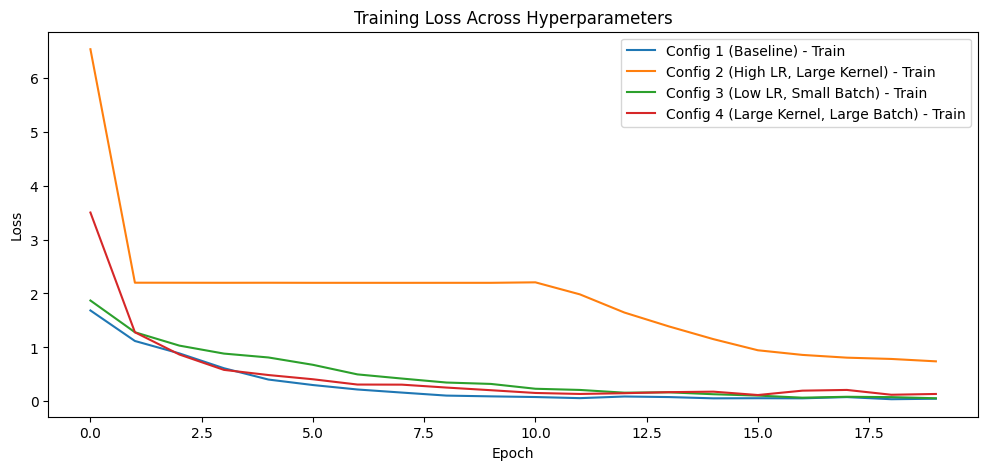

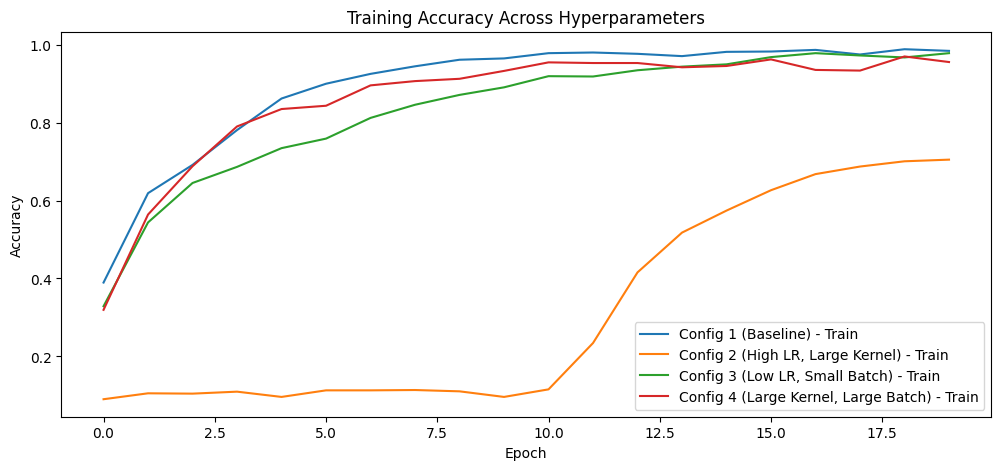

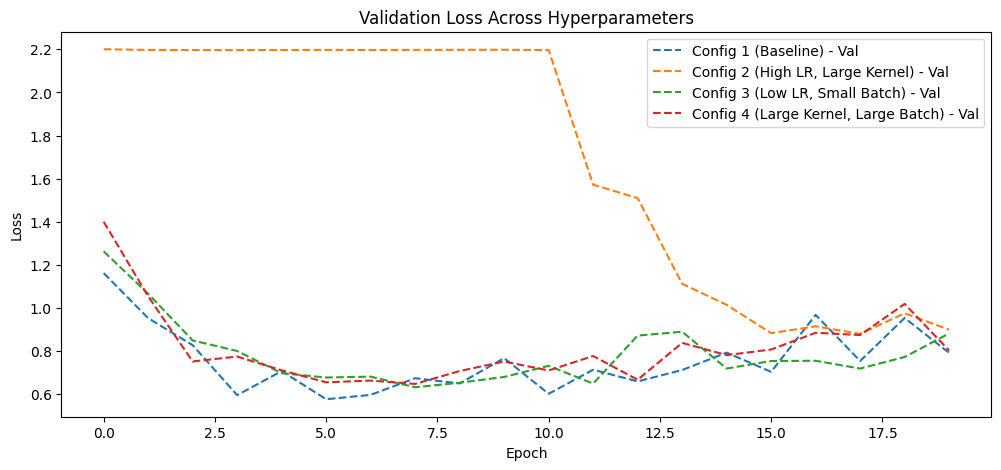

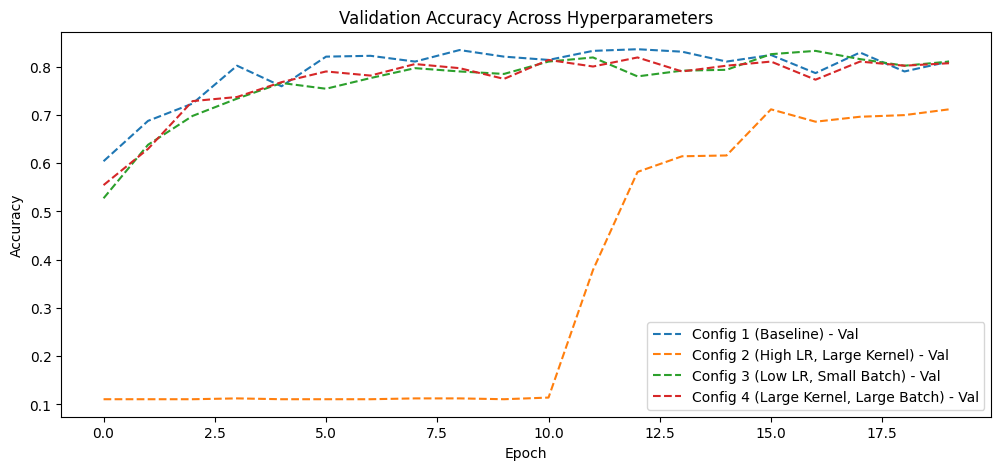

In [ ]:

plt.figure(figsize=(12, 5))
for label, data in results.items():
    plt.plot(data["train_loss"], label=f"{label} - Train")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Across Hyperparameters")
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
for label, data in results.items():
    plt.plot(data["train_acc"], label=f"{label} - Train")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy Across Hyperparameters")
plt.legend()
plt.show()
plt.figure(figsize=(12, 5))
for label, data in results.items():
    plt.plot(data["val_loss"], linestyle="dashed", label=f"{label} - Val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Validation Loss Across Hyperparameters")
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
for label, data in results.items():
    plt.plot(data["val_acc"], linestyle="dashed", label=f"{label} - Val")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy Across Hyperparameters")
plt.legend()
plt.show()

### Part (c) - 3 pt
Choose the best model out of all the ones that you have trained. Justify your choice.

I chose model one with lr = 0.001, kernel size = 3, and batch size = 64. This is because this model achieved the best training accuracy without overfitting, the lowest validation loss, and highest validation accuracy.

### Part (d) - 4 pt
Report the test accuracy of your best model. You should only do this step once and prior to this step you should have only used the training and validation data.

In [ ]:
def test_model(net, test_loader):#create new function in order to get the test accuracy
    net.eval()

    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    test_accuracy = correct / total
    return test_accuracy
model = CNN_GestureClassifier(num_classes=9, kernel_size=3)
best_model_path = "checkpoints/gesture_cnn_epoch20.pth"
model.load_state_dict(torch.load(best_model_path))  # Load trained weights
model.eval()
final_test_accuracy = test_model(model, test_loader)
print(f"The final test accuracy is: {final_test_accuracy * 100:.2f}%")


The final test accuracy is: 60.63%


### 4. Transfer Learning [15 pt]
For many image classification tasks, it is generally not a good idea to train a very large deep neural network
model from scratch due to the enormous compute requirements and lack of sufficient amounts of training
data.

One of the better options is to try using an existing model that performs a similar task to the one you need
to solve. This method of utilizing a pre-trained network for other similar tasks is broadly termed **Transfer
Learning**. In this assignment, we will use Transfer Learning to extract features from the hand gesture
images. Then, train a smaller network to use these features as input and classify the hand gestures.

As you have learned from the CNN lecture, convolution layers extract various features from the images which
get utilized by the fully connected layers for correct classification. AlexNet architecture played a pivotal
role in establishing Deep Neural Nets as a go-to tool for image classification problems and we will use an
ImageNet pre-trained AlexNet model to extract features in this assignment.

### Part (a) - 5 pt
Here is the code to load the AlexNet network, with pretrained weights. When you first run the code, PyTorch
will download the pretrained weights from the internet.

In [ ]:
import torch
import torchvision.models as models

model_path = "/Users/shakthi/Downloads/alexnet-owt-7be5be79.pth"
alexnet = models.alexnet()
alexnet.load_state_dict(torch.load(model_path))
alexnet.eval()  #sets model to evaluation mode




✅ AlexNet Model Loaded Successfully!


In [ ]:
import torchvision.models
#alexnet = torchvision.models.alexnet(pretrained=True)

The alexnet model is split up into two components: *alexnet.features* and *alexnet.classifier*. The
first neural network component, *alexnet.features*, is used to compute convolutional features, which are
taken as input in *alexnet.classifier*.

The neural network alexnet.features expects an image tensor of shape Nx3x224x224 as input and it will
output a tensor of shape Nx256x6x6 . (N = batch size).

Compute the AlexNet features for each of your training, validation, and test data. Here is an example code
snippet showing how you can compute the AlexNet features for some images (your actual code might be
different):

In [ ]:
# img = ... a PyTorch tensor with shape [N,3,224,224] containing hand images ...
#features = alexnet.features(img)

alexnet_features = alexnet.features  #convolutional features computed
alexnet_features.eval()

def compute_alexnet_features(data_loader, model):
    model.eval()

    all_features = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            features = model(inputs)  # Extract features (Nx256x6x6)
            all_features.append(features.cpu())  # Move to CPU to save
            all_labels.append(labels.cpu())

    return torch.cat(all_features), torch.cat(all_labels)

train_features, train_labels = compute_alexnet_features(train_loader, alexnet_features)#alexnet features computed on train data
val_features, val_labels = compute_alexnet_features(val_loader, alexnet_features)#validation data
test_features, test_labels = compute_alexnet_features(test_loader, alexnet_features)#and test data



**Save the computed features**. You will be using these features as input to your neural network in Part
(b), and you do not want to re-compute the features every time. Instead, run *alexnet.features* once for
each image, and save the result.

In [ ]:

torch.save((train_features, train_labels), "train_features.pt")
torch.save((val_features, val_labels), "val_features.pt")
torch.save((test_features, test_labels), "test_features.pt")


### Part (b) - 3 pt
Build a convolutional neural network model that takes as input these AlexNet features, and makes a
prediction. Your model should be a subclass of nn.Module.

Explain your choice of neural network architecture: how many layers did you choose? What types of layers
did you use: fully-connected or convolutional? What about other decisions like pooling layers, activation
functions, number of channels / hidden units in each layer?

Here is an example of how your model may be called:

I chose a three-layer fully connected network since the input already consists of precomputed alexnet convolutional features (256x6x6). The first fully connected layer reduces the input to 512 hidden units, followed by a second fully connected layer with 256 hidden units, and a final output layer matching the number of classes. relu activation is used for non-linearity, and dropout (0.5) after the first two layers prevents overfitting. no pooling layers are needed since the spatial information is already processed by alexnet.

In [ ]:


class AlexNetFeatureClassifier(nn.Module):
    def __init__(self, num_classes):
        super(AlexNetFeatureClassifier, self).__init__()

        # flatten alexnet features from 256x6x6 to a single vector
        self.fc1 = nn.Linear(256 * 6 * 6, 512)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 256)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(256, num_classes)

    def forward(self, features):
        # reshape features to match fully connected input
        x = features.view(features.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# define number of output classes for classification
num_classes = 9
model = AlexNetFeatureClassifier(num_classes)

# create random tensor to simulate extracted alexnet features
features = torch.randn(32, 256, 6, 6)

# features = ... load precomputed alexnet.features(img) ...
output = model(features)
prob = F.softmax(output)

print("Model output shape:", output.shape)  # Expected: (32, 9)
print("Softmax probabilities shape:", prob.shape)  # Expected: (32, 9)


Model output shape: torch.Size([32, 9])
Softmax probabilities shape: torch.Size([32, 9])


/var/folders/ds/fdv9s1f124q2vhhp37fxqk280000gn/T/ipykernel_10781/247015111.py:31: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  prob = F.softmax(output)


### Part (c) - 5 pt
Train your new network, including any hyperparameter tuning. Plot and submit the training curve of your
best model only.

Note: Depending on how you are caching (saving) your AlexNet features, PyTorch might still be tracking
updates to the **AlexNet weights**, which we are not tuning. One workaround is to convert your AlexNet
feature tensor into a numpy array, and then back into a PyTorch tensor.

Epoch 1/20: Train Loss: 1.5525, Train Acc: 0.4351, Val Loss: 0.8856, Val Acc: 0.7235
Epoch 2/20: Train Loss: 0.8202, Train Acc: 0.7083, Val Loss: 0.3442, Val Acc: 0.9096
Epoch 3/20: Train Loss: 0.4547, Train Acc: 0.8255, Val Loss: 0.2839, Val Acc: 0.8959
Epoch 4/20: Train Loss: 0.3311, Train Acc: 0.8828, Val Loss: 0.2049, Val Acc: 0.9352
Epoch 5/20: Train Loss: 0.2539, Train Acc: 0.9039, Val Loss: 0.1669, Val Acc: 0.9556
Epoch 6/20: Train Loss: 0.2285, Train Acc: 0.9241, Val Loss: 0.1364, Val Acc: 0.9642
Epoch 7/20: Train Loss: 0.1437, Train Acc: 0.9435, Val Loss: 0.2021, Val Acc: 0.9300
Epoch 8/20: Train Loss: 0.1334, Train Acc: 0.9545, Val Loss: 0.1348, Val Acc: 0.9573
Epoch 9/20: Train Loss: 0.1070, Train Acc: 0.9646, Val Loss: 0.1601, Val Acc: 0.9522
Epoch 10/20: Train Loss: 0.1073, Train Acc: 0.9654, Val Loss: 0.1214, Val Acc: 0.9676
Epoch 11/20: Train Loss: 0.1292, Train Acc: 0.9604, Val Loss: 0.1342, Val Acc: 0.9710
Epoch 12/20: Train Loss: 0.0910, Train Acc: 0.9696, Val Loss: 0

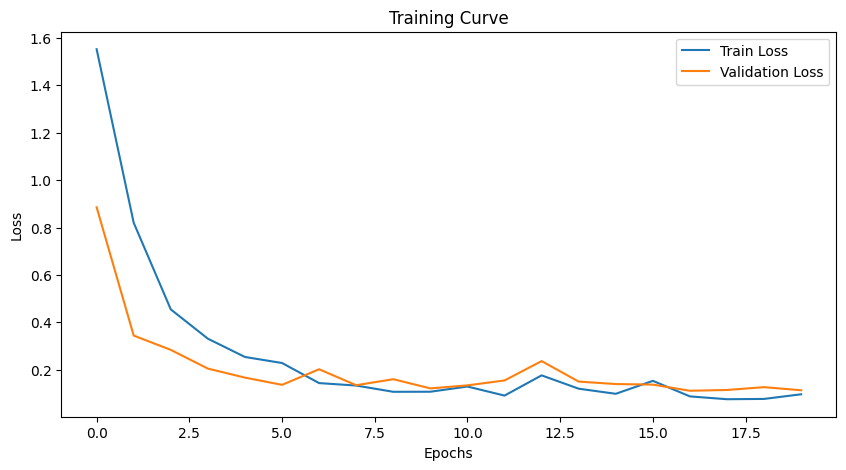

In [ ]:
#tensor = torch.from_numpy(tensor.detach().numpy())

from torch.utils.data import TensorDataset, DataLoader

# load precomputed alexnet features and labels
train_features, train_labels = torch.load("train_features.pt")
val_features, val_labels = torch.load("val_features.pt")

# detach features from computation graph
train_features = torch.from_numpy(train_features.detach().numpy())
val_features = torch.from_numpy(val_features.detach().numpy())

# create tensor datasets for training and validation
train_dataset = TensorDataset(train_features, train_labels.long())
val_dataset = TensorDataset(val_features, val_labels.long())

# define data loaders for batch processing
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


# function to train the model and track performance
def train_net(model, train_loader, val_loader, batch_size=32, learning_rate=0.001, num_epochs=40, checkpoint_dir="checkpoints"):
    torch.manual_seed(1000)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)
    train_loss, val_loss, val_accuracy = [], [], []
    os.makedirs(checkpoint_dir, exist_ok=True)
    best_val_acc = 0.0

    start_time = time.time()
    for epoch in range(num_epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0
        for features, labels in train_loader:
            features, labels = features.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(features)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
        train_loss.append(running_loss / len(train_loader))
        train_acc = correct / total

        model.eval()
        correct, total, val_running_loss = 0, 0, 0.0
        with torch.no_grad():
            for features, labels in val_loader:
                features, labels = features.to(device), labels.to(device)
                outputs = model(features)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)
        val_loss.append(val_running_loss / len(val_loader))
        val_acc = correct / total
        val_accuracy.append(val_acc)

        print(f"Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss[-1]:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss[-1]:.4f}, Val Acc: {val_acc:.4f}")

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model_path = os.path.join(checkpoint_dir, "best_model.pth")
            torch.save(model.state_dict(), best_model_path)


    # plot training loss curve
    plt.figure(figsize=(10, 5))
    plt.plot(train_loss, label="Train Loss")
    plt.plot(val_loss, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training Curve")
    plt.legend()
    plt.show()


# initialize model and train it
num_classes = 9
model = AlexNetFeatureClassifier(num_classes)
train_net(model, train_loader, val_loader, batch_size=64, learning_rate=0.001, num_epochs=20, checkpoint_dir="checkpoints")


### Part (d) - 2 pt
Report the test accuracy of your best model. How does the test accuracy compare to Part 3(d) without transfer learning?

In [ ]:
# load precomputed test features and labels
test_features, test_labels = torch.load("test_features.pt")

# detach test features from computation graph
test_features = torch.from_numpy(test_features.detach().numpy())

# create tensor dataset and data loader
test_dataset = TensorDataset(test_features, test_labels.long())
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# initialize model and load best saved checkpoint
num_classes = 9
best_model = AlexNetFeatureClassifier(num_classes)
best_model_path = "checkpoints/best_model.pth"
best_model.load_state_dict(torch.load(best_model_path))
best_model.eval()

# function to evaluate test accuracy
def evaluate_test_model(model, test_loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for features, labels in test_loader:
            outputs = model(features)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    return correct / total

# compute and print final test accuracy
final_test_accuracy = evaluate_test_model(best_model, test_loader)
print(f"The final test accuracy (with transfer learning): {final_test_accuracy * 100:.2f}%")

# compare test accuracy to model trained from scratch
baseline_accuracy = 60.63  # replace with actual value from part 3d
print(f"Comparison: baseline={baseline_accuracy}% vs transfer learning={final_test_accuracy * 100:.2f}%")


The final test accuracy (with transfer learning): 84.56%
Comparison: baseline=60.63% vs transfer learning=84.56%
